## Marciniak, Duncan, and Hu (2002): Mechanics of Sheet Metal Forming.
### (Worked example) maximum uniform strain

<img src="marciniak_example_maximum_uniform_strain.png" alt="Stamping" width="300"/>


The length, width and thickness of the parallel reduced section of a tensile test-piece are
$l_0=100$, $w_0=12.5$ and $t_0=0.8$ mm respectively. The material has a stress-strain curve ﬁtted by the relation $\sigma_1 = 700 \, \varepsilon_1^{0.22}$ MPa. Over a small length, the width is $\Delta w_0 = 0.05$ mm less than elsewhere.

Estimate the strain in the uniform region ($\varepsilon_u$) of the test-piece after the strip has been tested
to failure.

### Solution

Known data:

In [1]:
# initial dimensions of the piece
L0 = 100
w0 = 12.5
t0 = 0.8

# stress-strain curve
K = 700
n = 0.22

# reduced width in a small length of the piece
Δw = -0.05
w0p = w0 + Δw

print('Width in a small length of the piece: %s mm' % w0p)

Width in a small length of the piece: 12.45 mm


If the imperfection did not exist, the uniform strain would be $\varepsilon_u = n = 0.22$.

If the imperfection exists, the uniform strain can be determined using the equation:

$$n-\varepsilon_u \approx \sqrt{-n\dfrac{\Delta A_0}{A_0}} $$

where $A_0 = w_0 \, t_0$ and $\Delta A_0 = \Delta w_0 \, t_0$.


In [2]:
A0 = w0*t0
ΔA0 = Δw*t0
print('A0 = %s mm2, ΔA0 = %.2f mm2 --> imperfection ratio, ΔA0/A0 = %.3f' 
      % (A0, ΔA0, ΔA0/A0))

import math
εu_ = n - math.sqrt(-n*ΔA0/A0)
print('Substituting in the equation --> uniform strain, εu = %.3f' % εu_)

A0 = 10.0 mm2, ΔA0 = -0.04 mm2 --> imperfection ratio, ΔA0/A0 = -0.004
Substituting in the equation --> uniform strain, εu = 0.190


As Marciniak states (page 66):
``This demonstrates a phenomenon often observed in sheet metal forming: very small changes in initial conditions (in this example, an imperfection ratio of only 0.4\%) can give large changes in the ﬁnal result ($n-\varepsilon_u = 0.03$). It is also found that if repeated tests are performed on apparently uniform material, there is considerable scatter in the observed maximum uniform strain. This is probably due to differences in the magnitude of imperfections that exist in individual test-pieces.''

## Load-elongation diagram: numerical solution

If the imperfection did not exist, the load path would be obtained from:

$$ F = \sigma_1 \, A = K \, \varepsilon_1^n \cdot A_0 \, e^{-\varepsilon_1} $$

If the imperfection exists, the load path can be obtained numerically by iterative calculation.

Let assume an initial yield stress Y = 178.4 MPa (at 0.2% elongation).
Total lenght = 100 mm = 12.5 mm (imperfect region) + 87.5 mm (perfect region)
Strain at the onset of necking: ε = n = 0.22 --> elongation, e = 0.246
Uniform strain (approximate value): εu = 0.190 --> uniform elongation, eu = 0.210
Uniform elongation: eu = 0.2040 (aproximation: 0.2097)


/tmp/ipykernel_76834/1383993952.py:33: RuntimeWarning: invalid value encountered in power
  Fpx = lambda ε1x: F[i] - K*ε1x**n * A0*math.exp(-ε1x)
/home/domi/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


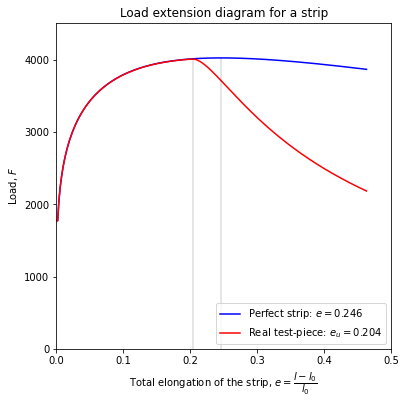

In [3]:
Y = K*0.002**n
print('Let assume an initial yield stress Y = %.1f MPa (at 0.2%% elongation).' % Y)

l0p = w0 # lenght of the imperfect region: diffuse neck extends for 
         # a distance approximately equal to the width of the strip
l0 = L0 - l0p # lenght of the perfect region
A0p = A0 + ΔA0
print('Total lenght = %s mm = %s mm (imperfect region) \
+ %s mm (perfect region)' % (L0, l0p, l0))

eu_ = math.exp(εu_) - 1
n_ = math.exp(n) - 1
print('Strain at the onset of necking: ε = n = %s --> \
elongation, e = %.3f' % (n, n_))
print('Uniform strain (approximate value): εu = %.3f --> \
uniform elongation, eu = %.3f' % (εu_, eu_))

# iterative calculation
from scipy.optimize import fsolve

ε1p, σ1p, Ap, lp = [0], [Y], [A0p], [l0p]
ε1, σ1, A, l = [0], [Y], [A0], [l0]
L, e1t, ε1t, F = [L0], [0], [0], [Y*A0p]
Δε1p = 0.002
i = 0
while ε1p[i] < 1.2:
    i = i+1
    ε1p.append(ε1p[i-1] + Δε1p)
    σ1p.append(K*ε1p[i]**n)
    Ap.append(A0p*math.exp(-ε1p[i]))
    lp.append(l0p*A0p/Ap[i])
    F.append(σ1p[i]*Ap[i])
    Fpx = lambda ε1x: F[i] - K*ε1x**n * A0*math.exp(-ε1x)
    ε1x, = fsolve(Fpx, ε1[i-1])
    if ε1x < ε1[i-1]: # maximum force was reached in the neck
        ε1x = ε1[i-1] # no more plastic strain in the uniform region
    ε1.append(ε1x)
    σ1.append(K*ε1[i]**n)
    A.append(A0*math.exp(-ε1[i]))
    l.append(l0*A0/A[i])
    L.append(l[i] + lp[i])
    e1t.append((L[i] - L0) / L0)
    ε1t.append(math.log(L[i]/L0))

# plot diagram
F_ = [K*ε1x**n * A0*math.exp(-ε1x) for ε1x in ε1t]
F_[0] = Y*A0
F_max = max(F_)
Fmax = max(F)
idx_eu = F.index(Fmax)
eu = e1t[idx_eu]
print('Uniform elongation: eu = %.4f (aproximation: %.4f)' % (eu, eu_))
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(e1t, F_, color='blue', label='Perfect strip: $e=%.3f$' % n_)
ax.plot(e1t, F, color='red', label='Real test-piece: $e_u=%.3f$' % eu)
ax.plot((n_,n_), (0,F_max), 'k', lw=0.2)
ax.plot((eu,eu), (0,Fmax), 'k', lw=0.2)
ax.axis([0, 0.5, 0, Fmax+500])
ax.set_xlabel(r'Total elongation of the strip, $e=\dfrac{l-l_0}{l_0}$')
ax.set_ylabel(r'Load, $F$')
plt.title('Load extension diagram for a strip')
plt.legend()
plt.show()    

### Strains in the perfect and imperfect regions

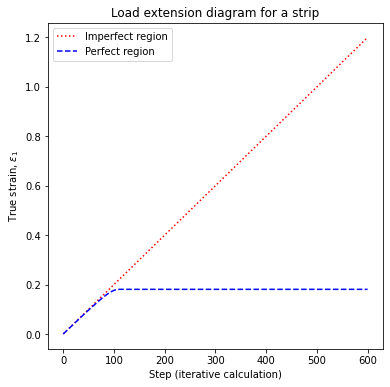

In [5]:
x = [i for i in range(len(ε1p))]
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, ε1p, ':', color='red', label='Imperfect region')
ax.plot(x, ε1, '--', color='blue', label='Perfect region')
#ax.plot(x, ε1t, color='green')
#ax.axis([0, 0.5, 0, Fmax+500])
ax.set_xlabel(r'Step (iterative calculation)')
ax.set_ylabel(r'True strain, $\varepsilon_1$')
plt.title('Load extension diagram for a strip')
plt.legend()
plt.show()    